In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import os

In [3]:
era5 = gpd.read_file(r"C:\Users\Tommy\Desktop\IGS_sh\era5.shp")
africa = gpd.read_file(r"C:\Users\Tommy\Documents\GIS_Data\africa\afr_g2014_2013_0.shp")

In [5]:
era5.columns

Index(['STN', 'LAT', 'LON', 'H', 'Mean_IGS', 'Mean_NGL', 'Mean_VMF3',
       'Mean_ERA5', 'Min_IGS', 'Max_IGS', 'Min_NGL', 'Max_NGL', 'Min_VMF3',
       'Max_VMF3', 'Min_ERA5', 'Max_ERA5', 'stdDevIGS', 'stdDeNGL',
       'stdDevVMF3', 'stdDevERA5', 'MB(IGSvsER', 'MAE(IGSvsE', 'RMSE(IGSvs',
       'MB(NGLvsER', 'MAE(NGLvsE', 'RMSE(NGLvs', 'MB(VMF3vsE', 'MAE(VMF3vs',
       'RMSE(VMF3v', 'MB(VMF3vsI', 'MAE(VMF3_1', 'RMSE(VMF_1', 'MB(VMF3vsN',
       'MAE(VMF3_2', 'RMSE(VMF_2', 'MB(IGSvsNG', 'MAE(IGSvsN', 'RMSE(IGS_1',
       'RMSEigs(3c', 'RMSEera5(3', 'RMSEvmf3(3', 'RMSEngl(3c', 'RMSEera5_1',
       'RMSEvmf3_1', 'RMSEigs(_1', 'RMSEngl(_1', 'RMSEvmf3_2', 'RMSEigs(_2',
       'RMSEngl(_2', 'RMSEvmf3_3', 'RMSEera5_2', 'RMSEigs(tc', 'RMSEera5(t',
       'RMSEvmf3(t', 'RMSEngl(tc', 'RMSEera5_3', 'RMSEvmf3_4', 'R_IGSvsERA',
       'R_NGLvsERA', 'R_VMF3vsER', 'R_IGSvsNGL', 'R_IGSvsVMF', 'R_NGLvsVMF',
       'R_igs(tc{I', 'R_era5(tc{', 'R_vmf3(tc{', 'R_ngl(tc{N', 'R_era5(t_1',
       'R_vmf3(t

In [3]:
data_path = os.path.join(os.getcwd(), 'data')
# print('Data path:', data_path)
era5_data = os.path.join(data_path, 'STATs_era5-Tm.csv')
gtrop_data = os.path.join(data_path, 'STATs_Gtrop-Tm.csv')

e5df = pd.read_csv(era5_data)
gtdf = pd.read_csv(gtrop_data)

era5_csv_cols = e5df.columns
gtrop_csv_cols = gtdf.columns

In [4]:
rms_cols = [item for item in era5_csv_cols if "3ch" in item]

print(rms_cols)
print([i for i in era5.columns if i in rms_cols])

['RMSEigs(3ch{IEV)', 'RMSEera5(3ch{IEV)', 'RMSEvmf3(3ch{IEV)', 'RMSEngl(3ch{NEV)', 'RMSEera5(3ch{NEV)', 'RMSEvmf3(3ch{NEV)', 'RMSEigs(3ch{INV)', 'RMSEngl(3ch{INV)', 'RMSEvmf3(3ch{INV)', 'RMSEigs(3ch{INVE)', 'RMSEngl(3ch{INVE)', 'RMSEvmf3(3ch{INVE)', 'RMSEera5(3ch{INVE)']
[]


C:\Users\Tommy\AppData\Local\Temp\ipykernel_16364\1795804044.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  afplot1.set_xticklabels(x_labels)
C:\Users\Tommy\AppData\Local\Temp\ipykernel_16364\1795804044.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  afplot1.set_yticklabels(y_labels)
C:\Users\Tommy\AppData\Local\Temp\ipykernel_16364\1795804044.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  afplot2.set_xticklabels(x_labels)
C:\Users\Tommy\AppData\Local\Temp\ipykernel_16364\1795804044.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  afplot2.set_yticklabels(y_labels)
C:\Users\Tommy\AppData\Local\Temp\ipykernel_16364\1795804044.py:40: User

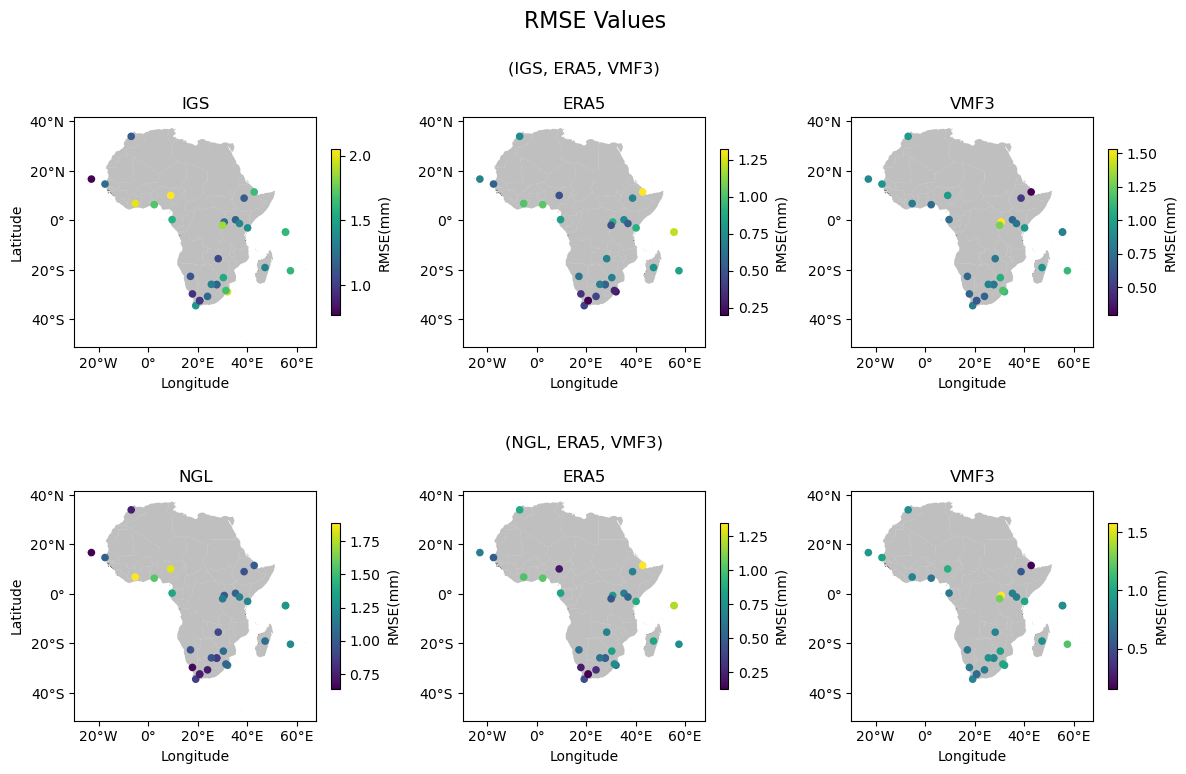

In [5]:
era_rms_cols = ['RMSE(IGSvsERA5)', 'RMSE(NGLvsERA5)', 'RMSE(VMF3vsERA5)', 'RMSE(VMF3vsIGS)', 'RMSE(VMF3vsNGL)', 'RMSE(IGSvsNGL)']


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("RMSE Values", fontsize=16)

# Plot the 'afplot' in all subplots
afplot1 = africa.plot(ax=axes[0, 0], color='gray', alpha=0.5)
# Get the current labels
x_labels = [item.get_text().replace('−', '-')+'°E' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°W' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot1.get_xticklabels()]
y_labels = [item.get_text().replace('−', '-')+'°N' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°S' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot1.get_yticklabels()]

# Set the new labels
afplot1.set_xlabel('Longitude')
afplot1.set_ylabel('Latitude')
afplot1.set_xticklabels(x_labels)
afplot1.set_yticklabels(y_labels)

afplot2 = africa.plot(ax=axes[0, 1], color='gray', alpha=0.5)
# Get the current labels
x_labels = [item.get_text().replace('−', '-')+'°E' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°W' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot2.get_xticklabels()]
y_labels = [item.get_text().replace('−', '-')+'°N' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°S' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot2.get_yticklabels()]

# Set the new labels
afplot2.set_xlabel('Longitude')
# afplot2.set_ylabel('Latitude')
afplot2.set_xticklabels(x_labels)
# afplot2.set_yticks([])
afplot2.set_yticklabels(y_labels)

afplot3 = africa.plot(ax=axes[0, 2], color='gray', alpha=0.5)
# Get the current labels
x_labels = [item.get_text().replace('−', '-')+'°E' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°W' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot3.get_xticklabels()]
y_labels = [item.get_text().replace('−', '-')+'°N' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°S' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot3.get_yticklabels()]

# Set the new labels
afplot3.set_xlabel('Longitude')
# afplot3.set_ylabel('Latitude')
afplot3.set_xticklabels(x_labels)
# afplot3.set_yticks([])
afplot3.set_yticklabels(y_labels)

afplot4 = africa.plot(ax=axes[1, 0], color='gray', alpha=0.5)
# Get the current labels
x_labels = [item.get_text().replace('−', '-')+'°E' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°W' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot4.get_xticklabels()]
y_labels = [item.get_text().replace('−', '-')+'°N' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°S' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot4.get_yticklabels()]

# Set the new labels
afplot4.set_xlabel('Longitude')
afplot4.set_ylabel('Latitude')
afplot4.set_xticklabels(x_labels)
afplot4.set_yticklabels(y_labels)

afplot5 = africa.plot(ax=axes[1, 1], color='gray', alpha=0.5)
# Get the current labels
x_labels = [item.get_text().replace('−', '-')+'°E' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°W' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot5.get_xticklabels()]
y_labels = [item.get_text().replace('−', '-')+'°N' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°S' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot5.get_yticklabels()]

# Set the new labels
afplot5.set_xlabel('Longitude')
# afplot5.set_ylabel('Latitude')
afplot5.set_xticklabels(x_labels)
# afplot5.set_yticks([])
afplot5.set_yticklabels(y_labels)

afplot6 = africa.plot(ax=axes[1, 2], color='gray', alpha=0.5)
# Get the current labels
x_labels = [item.get_text().replace('−', '-')+'°E' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°W' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot6.get_xticklabels()]
y_labels = [item.get_text().replace('−', '-')+'°N' if float(item.get_text().replace('−', '-'))>0 else item.get_text().replace('−', '-')[1:]+'°S' if float(item.get_text().replace('−', '-'))<0 else '0°' for item in afplot6.get_yticklabels()]

# Set the new labels
afplot6.set_xlabel('Longitude')
# afplot6.set_ylabel('Latitude')
afplot6.set_xticklabels(x_labels)
# afplot6.set_yticks([])
afplot6.set_yticklabels(y_labels)

# 'RMSEigs(tc', 'RMSEera5(t',
#        'RMSEvmf3(t', 'RMSEngl(tc', 'RMSEera5_3', 'RMSEvmf3_4'

# Plot 'era5' data for different columns in the subplots
era5.plot(ax=afplot1, marker='o', markersize=20, column='RMSEigs(tc', cmap="viridis", legend=True, legend_kwds={'label': 'RMSE(mm)', 'shrink': 0.5})
era5.plot(ax=afplot2, marker='o', markersize=20, column='RMSEera5(t', cmap="viridis", legend=True, legend_kwds={'label': 'RMSE(mm)', 'shrink': 0.5})
era5.plot(ax=afplot3, marker='o', markersize=20, column='RMSEvmf3(t', cmap="viridis", legend=True, legend_kwds={'label': 'RMSE(mm)', 'shrink': 0.5})
era5.plot(ax=afplot4, marker='o', markersize=20, column='RMSEngl(tc', cmap="viridis", legend=True, legend_kwds={'label': 'RMSE(mm)', 'shrink': 0.5})
era5.plot(ax=afplot5, marker='o', markersize=20, column='RMSEera5_3', cmap="viridis", legend=True, legend_kwds={'label': 'RMSE(mm)', 'shrink': 0.5})
era5.plot(ax=afplot6, marker='o', markersize=20, column='RMSEvmf3_4', cmap="viridis", legend=True, legend_kwds={'label': 'RMSE(mm)', 'shrink': 0.5})

# Set titles for the subplots
axes[0, 0].set_title('IGS')
axes[0, 1].set_title('(IGS, ERA5, VMF3)\n\nERA5')
axes[0, 2].set_title('VMF3')
axes[1, 0].set_title('NGL')
axes[1, 1].set_title('(NGL, ERA5, VMF3)\n\nERA5')
axes[1, 2].set_title('VMF3')

plt.tight_layout()
plt.savefig(r".\rmstc\RMSE_TC-ERA5.jpeg", dpi=150)
# plt.show()

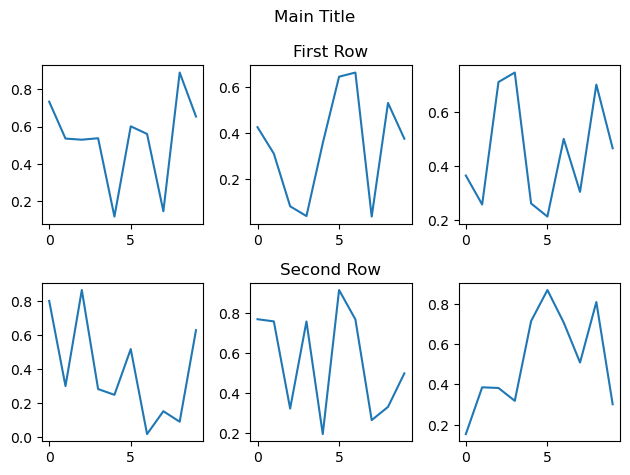

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate dummy data
data1 = np.random.rand(10)
data2 = np.random.rand(10)
data3 = np.random.rand(10)
data4 = np.random.rand(10)
data5 = np.random.rand(10)
data6 = np.random.rand(10)

fig, axs = plt.subplots(2, 3)

# Set main title
fig.suptitle('Main Title')

# Set row titles
axs[0, 1].set_title('First Row')
axs[1, 1].set_title('Second Row')

# Plot data on each subplot
axs[0, 0].plot(data1)
axs[0, 1].plot(data2)
axs[0, 2].plot(data3)
axs[1, 0].plot(data4)
axs[1, 1].plot(data5)
axs[1, 2].plot(data6)

plt.tight_layout()
plt.show()
